In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [11]:
img = tf.keras.preprocessing.image.load_img("basedata/train/cardboard/cardboard1.jpg")

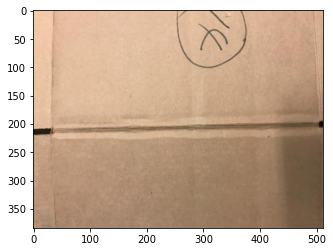

In [12]:
plt.imshow(img)

In [14]:
cv2.imread("basedata/train/cardboard/cardboard1.jpg").shape

(384, 512, 3)

In [24]:
cv2.imread("basedata/train/cardboard/cardboard1.jpg")

array([[[165, 200, 240],
        [165, 200, 240],
        [166, 201, 241],
        ...,
        [141, 170, 214],
        [143, 172, 216],
        [144, 173, 217]],

       [[166, 201, 241],
        [167, 202, 242],
        [168, 203, 243],
        ...,
        [142, 171, 215],
        [143, 172, 216],
        [143, 172, 216]],

       [[168, 203, 243],
        [169, 204, 244],
        [169, 204, 244],
        ...,
        [143, 172, 216],
        [142, 171, 215],
        [142, 171, 215]],

       ...,

       [[118, 147, 186],
        [119, 148, 187],
        [123, 149, 189],
        ...,
        [ 68,  90, 115],
        [ 68,  90, 115],
        [ 68,  90, 115]],

       [[118, 147, 186],
        [118, 147, 186],
        [120, 146, 186],
        ...,
        [ 67,  89, 114],
        [ 68,  90, 115],
        [ 68,  90, 115]],

       [[120, 149, 188],
        [118, 147, 186],
        [118, 144, 184],
        ...,
        [ 67,  89, 114],
        [ 68,  90, 115],
        [ 68,  90, 115]]

In [25]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [19]:
train_dataset = train.flow_from_directory('basedata/train',
                                         target_size = (200,200),
                                         batch_size = 32,
                                         class_mode =  'categorical')
validation_dataset = train.flow_from_directory('basedata/test',
                                         target_size = (200,200),
                                         batch_size = 32,
                                         class_mode =  'categorical')

Found 2023 images belonging to 6 classes.
Found 504 images belonging to 6 classes.


In [21]:
train_dataset.class_indices
validation_dataset.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [28]:
train_dataset.classes

array([0, 0, 0, ..., 5, 5, 5])

In [47]:
# initialising sequential model and adding layers to it
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[200, 200, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(6, activation='softmax'))

In [49]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 48)      1344      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 99, 99, 48)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 97, 97, 48)        20784     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 48)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 32)        13856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16928)            

In [48]:
# finally compile and train the cnn
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn.fit(x=train_dataset, validation_data=validation_dataset, epochs=30)

Epoch 1/30
64/64 [==============================] - 112s 2s/step - loss: 1.6132 - accuracy: 0.3129 - val_loss: 1.3535 - val_accuracy: 0.4226
Epoch 2/30
64/64 [==============================] - 87s 1s/step - loss: 1.3854 - accuracy: 0.4394 - val_loss: 1.2271 - val_accuracy: 0.5357
Epoch 3/30
64/64 [==============================] - 87s 1s/step - loss: 1.2549 - accuracy: 0.5136 - val_loss: 1.1718 - val_accuracy: 0.5833
Epoch 4/30
64/64 [==============================] - 86s 1s/step - loss: 1.0988 - accuracy: 0.5769 - val_loss: 1.1593 - val_accuracy: 0.5754
Epoch 5/30
64/64 [==============================] - 89s 1s/step - loss: 0.9731 - accuracy: 0.6372 - val_loss: 1.0973 - val_accuracy: 0.6071
Epoch 6/30
64/64 [==============================] - 85s 1s/step - loss: 0.7724 - accuracy: 0.7148 - val_loss: 1.0825 - val_accuracy: 0.5734
Epoch 7/30
64/64 [==============================] - 86s 1s/step - loss: 0.5988 - accuracy: 0.7721 - val_loss: 1.1512 - val_accuracy: 0.6210
Epoch 8/30
64/64 [=

In [50]:
cnn.save("multiclassgarbage.h5")

In [51]:
# history=cnn

In [54]:
# acc =cnn['accuracy']
# val_acc = cnn['val_accuracy']
# loss = cnn['loss']
# val_loss = cnn['val_loss']

# epochs_range = range(30)

# plt.figure(figsize=(15, 15))
# plt.subplot(2, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(2, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

TypeError: 'Sequential' object is not subscriptable

In [57]:
tf.saved_model.save(cnn,'Classification using CNN(Garbage Collection)')


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: Classification using CNN(Garbage Collection)\assets
